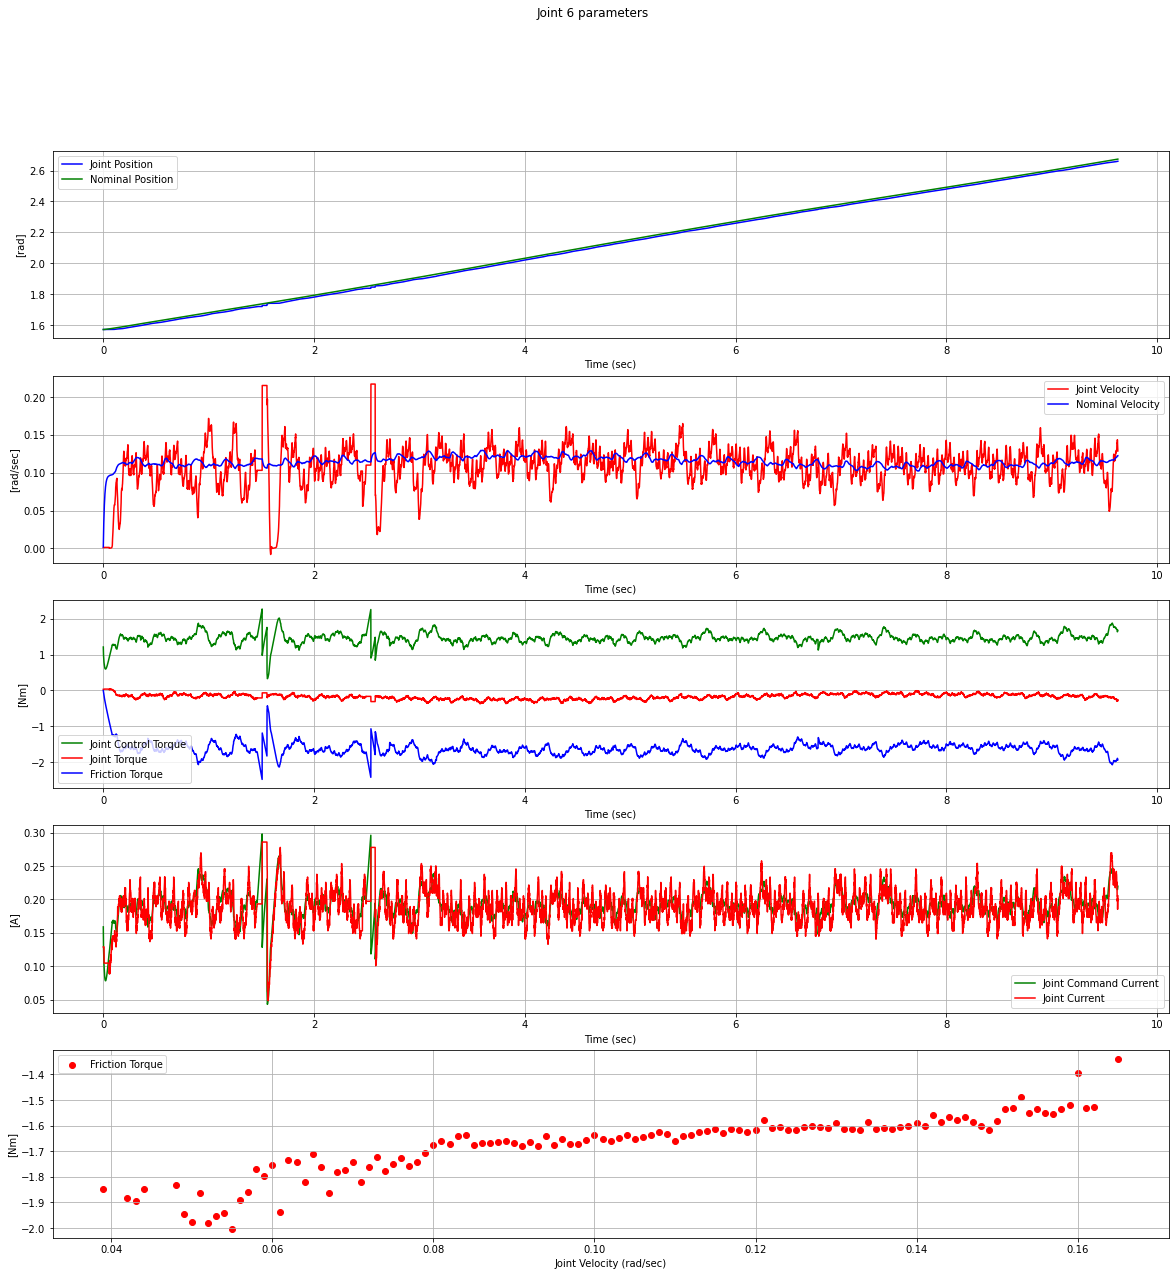

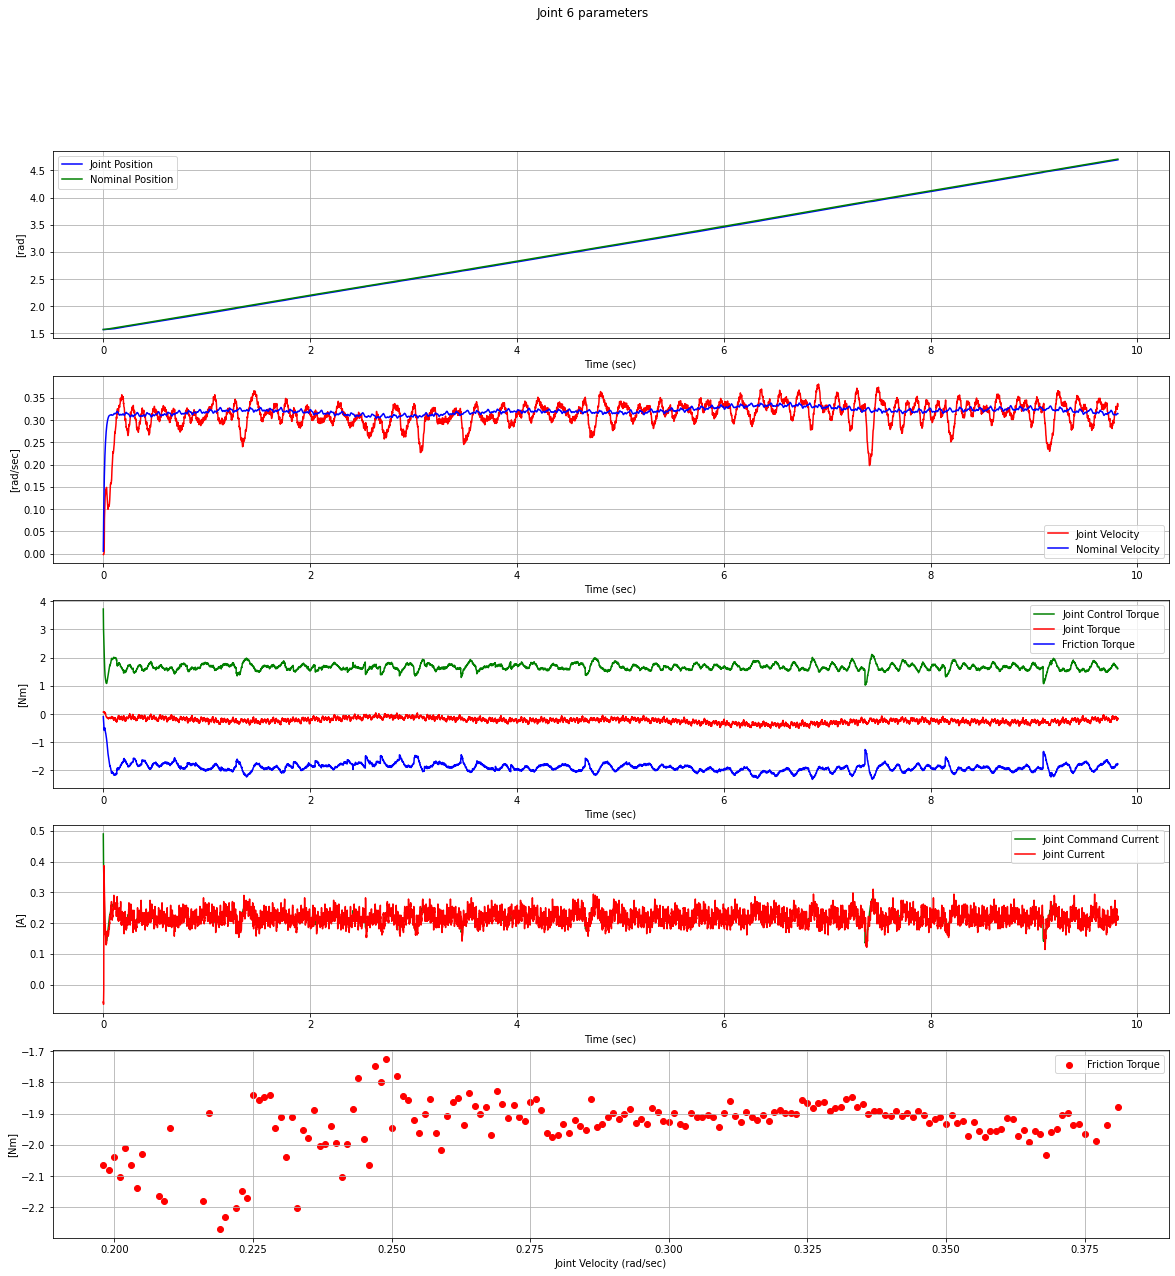

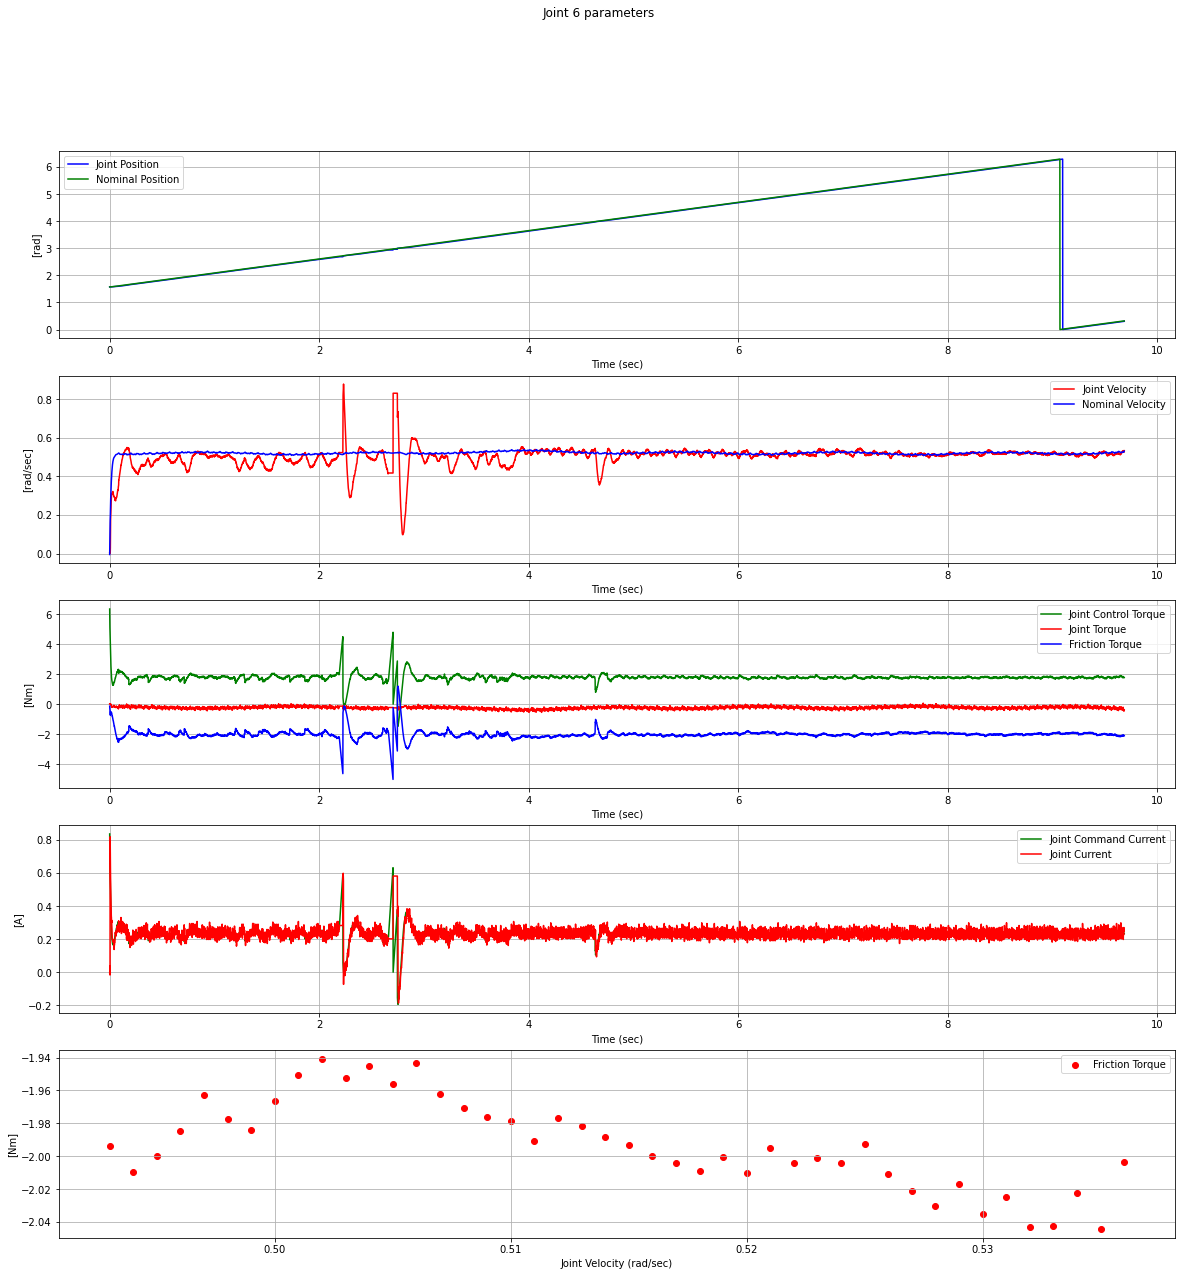

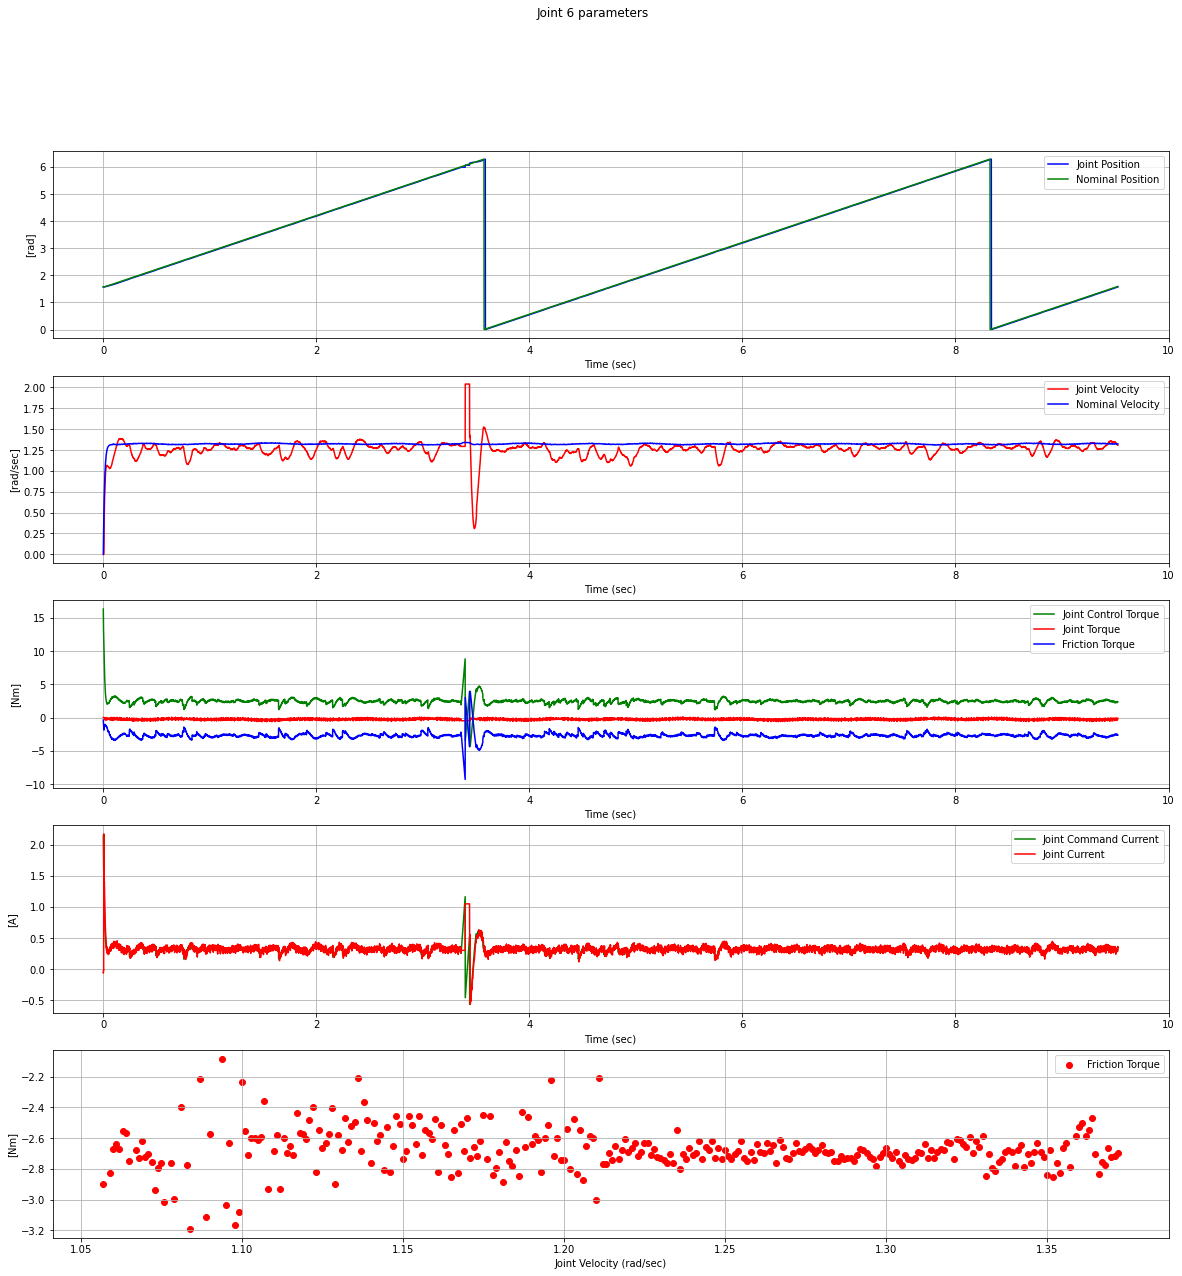

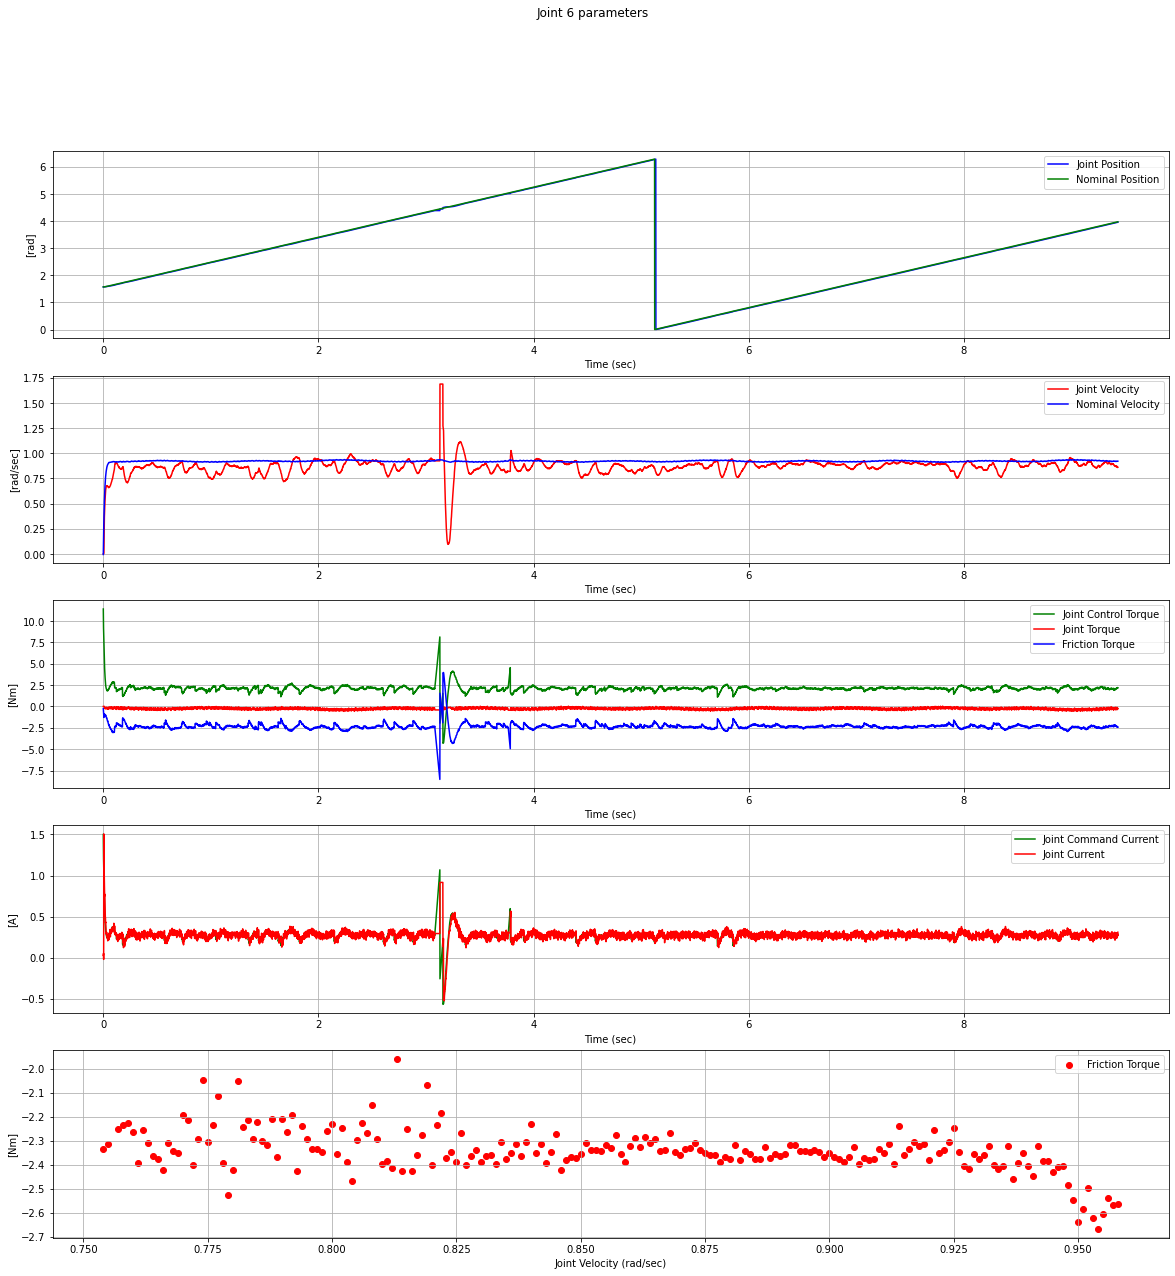

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import csv
import glob
cut_off = [2500,1500,7000,3500,3500]
path = 'data' # use your folder name
file_name = glob.glob(path + "/*.csv")
for j in range(len(file_name)):
    jnt_ctrl_torque=[]
    jnt_position=[]
    jnt_velocity=[]
    jnt_torque=[]
    jnt_command_current=[]
    jnt_current=[]
    friction_torque=[]
    nominal_pos=[]
    nominal_vel=[]
    initial_position=[]
    initial_velocity=[]
    t=[]
    c=0
    content = genfromtxt(file_name[j], delimiter=' ')
    for i in content[:,0]:
        jnt_ctrl_torque.append(i)
        c=c+1
        t.append(c)
    for i in content[:,1]:
        jnt_position.append(i)
    for i in content[:,2]:
        jnt_velocity.append(i)
    for i in content[:,3]:
        jnt_torque.append(i)
    for i in content[:,4]:
        jnt_command_current.append(i)
    for i in content[:,5]:
        jnt_current.append(i)
    for i in content[:,6]:
        friction_torque.append(i)
    for i in content[:,7]:
        nominal_pos.append(i)
    for i in content[:,8]:
        nominal_vel.append(i)
    for i in content[:,9]:
        initial_position.append(i)
    for i in content[:,10]:
        initial_velocity.append(i)
    for k in range(len(t)):
        t[k]=t[k]/900
    ty= np.round(jnt_velocity,3)
    jv=[]
    ft=[]
    dic={}
    for i in range(len(t)):
        if (i>cut_off[j]):
            jv.append(ty[i])
            ft.append(friction_torque[i])
            dic[ty[i]]= friction_torque[i]


    key=[]
    value=[]
    M=[]
    K=[]
    for k,v in dic.items():
        key.append(float(k))
        value.append(v)
    for jl in range(len(key)):
        l=[i for i, e in enumerate(jv) if e == key[jl]]
        M.append((np.mean([ft[jk] for jk in l])))
    mul= 1
    for q in range(len(key)):
        K.append(key[q]*mul)

    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5)
    fig.set_figwidth(20)
    fig.set_figheight(20)
    fig.suptitle('Joint 6 parameters')

    ax1.plot(t, jnt_position, color='b', label='Joint Position')
    ax1.plot(t, nominal_pos, color='g', label='Nominal Position')
    ax1.legend()
    ax1.grid()
    ax1.set_xlabel("Time (sec)")
    ax1.set_ylabel("[rad]")

    ax2.plot(t, jnt_velocity, color='r', label='Joint Velocity')
    ax2.plot(t, nominal_vel, color='b', label='Nominal Velocity')
    ax2.legend()
    ax2.grid()
    ax2.set_xlabel("Time (sec)")
    ax2.set_ylabel("[rad/sec]")

    ax3.plot(t, jnt_ctrl_torque, color='g', label='Joint Control Torque')
    ax3.plot(t, jnt_torque, color='r', label='Joint Torque')
    ax3.plot(t, friction_torque, color='b', label='Friction Torque')
    ax3.legend()
    ax3.grid()
    ax3.set_xlabel("Time (sec)")
    ax3.set_ylabel("[Nm]")

    ax4.plot(t, jnt_command_current, color='g', label='Joint Command Current')
    ax4.plot(t, jnt_current, color='r', label='Joint Current')
    ax4.legend()
    ax4.grid()
    ax4.set_xlabel("Time (sec)")
    ax4.set_ylabel("[A]")

    ax5.scatter(K, M, color='r', label='Friction Torque')
    ax5.legend()
    ax5.grid()
    ax5.set_xlabel("Joint Velocity (rad/sec)")
    ax5.set_ylabel("[Nm]")
    
    plt.savefig('plots/Joint_6_params_file_'+str(j)+'.png')